<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

In [36]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

housing = fetch_california_housing(as_frame=True)

In [37]:
target = housing.target
features = housing.data[["Longitude", "Latitude"]]
df = pd.concat([features, target])

df.columns

Index(['Longitude', 'Latitude', 0], dtype='object')

<Axes: xlabel='Longitude', ylabel='Latitude'>

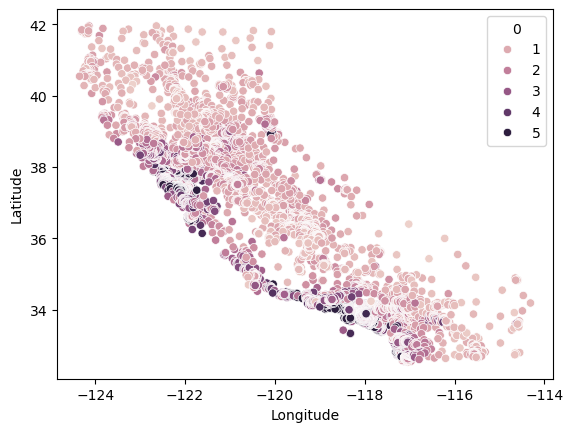

In [38]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 0)

In [39]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[[0]], test_size=0.33, random_state=0)

In [41]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

For cluster = 1, SSE/WCSS is 119416.58576670047
For cluster = 2, SSE/WCSS is 43397.78372536609
For cluster = 3, SSE/WCSS is 12559.41142423858
For cluster = 4, SSE/WCSS is 9756.792024736686
For cluster = 5, SSE/WCSS is 7083.951672430092
For cluster = 6, SSE/WCSS is 5542.268677125337
For cluster = 7, SSE/WCSS is 4838.51525944236
For cluster = 8, SSE/WCSS is 4259.33885245622
For cluster = 9, SSE/WCSS is 3731.5518117278516
For cluster = 10, SSE/WCSS is 3341.8503917893177


Text(0, 0.5, 'WCSS')

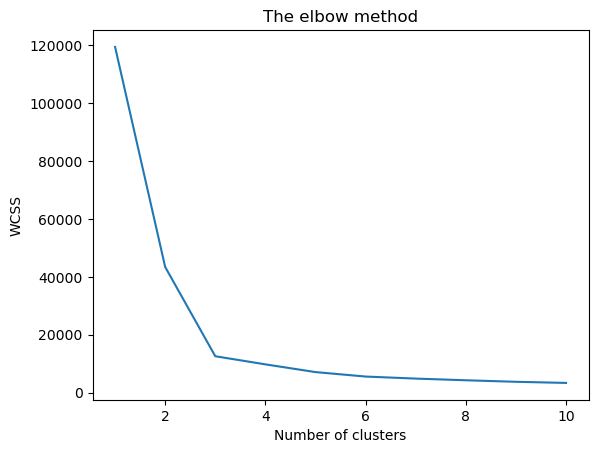

In [44]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    wcss[i-1] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, wcss[i-1]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


<Axes: xlabel='Longitude', ylabel='Latitude'>

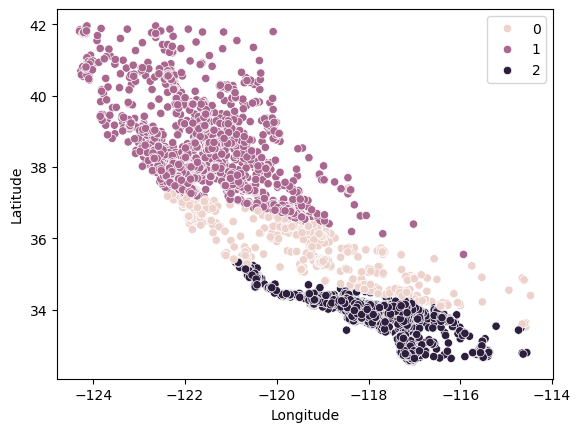

In [46]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

## Use the Elbow method to find the correct value of K